In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import feather
import os

In [97]:
#path to data:                                                                                                                                                               
data_path = '/Volumes/FileStorage/Insight_data/'
ohio_path = '/Volumes/FileStorage/Insight_data/Ohio_data/data_feather/'

#open four ohio data files                                                                                                                                                   
#files: SWVF_1_22.feather  SWVF_23_44.feather SWVF_45_66.feather SWVF_67_88.feather                                                                                          
oh1_df = feather.read_dataframe(ohio_path+'SWVF_1_22.feather')
oh2_df = feather.read_dataframe(ohio_path+'SWVF_23_44.feather')
oh3_df = feather.read_dataframe(ohio_path+'SWVF_45_66.feather')
oh4_df = feather.read_dataframe(ohio_path+'SWVF_67_88.feather')

In [98]:
#combine into one dataframe                                                                                                                                                  
oh_df = pd.concat([oh1_df,oh2_df,oh3_df,oh4_df])

In [99]:
columns=list(oh_df) #list of column names                                                                                                                                    
print(columns)

['SOS_VOTERID', 'COUNTY_NUMBER', 'COUNTY_ID', 'LAST_NAME', 'FIRST_NAME', 'MIDDLE_NAME', 'SUFFIX', 'DATE_OF_BIRTH', 'REGISTRATION_DATE', 'VOTER_STATUS', 'PARTY_AFFILIATION', 'RESIDENTIAL_ADDRESS1', 'RESIDENTIAL_SECONDARY_ADDR', 'RESIDENTIAL_CITY', 'RESIDENTIAL_STATE', 'RESIDENTIAL_ZIP', 'RESIDENTIAL_ZIP_PLUS4', 'RESIDENTIAL_COUNTRY', 'RESIDENTIAL_POSTALCODE', 'MAILING_ADDRESS1', 'MAILING_SECONDARY_ADDRESS', 'MAILING_CITY', 'MAILING_STATE', 'MAILING_ZIP', 'MAILING_ZIP_PLUS4', 'MAILING_COUNTRY', 'MAILING_POSTAL_CODE', 'CAREER_CENTER', 'CITY', 'CITY_SCHOOL_DISTRICT', 'COUNTY_COURT_DISTRICT', 'CONGRESSIONAL_DISTRICT', 'COURT_OF_APPEALS', 'EDU_SERVICE_CENTER_DISTRICT', 'EXEMPTED_VILL_SCHOOL_DISTRICT', 'LIBRARY', 'LOCAL_SCHOOL_DISTRICT', 'MUNICIPAL_COURT_DISTRICT', 'PRECINCT_NAME', 'PRECINCT_CODE', 'STATE_BOARD_OF_EDUCATION', 'STATE_REPRESENTATIVE_DISTRICT', 'STATE_SENATE_DISTRICT', 'TOWNSHIP', 'VILLAGE', 'WARD', 'PRIMARY-03/07/2000', 'GENERAL-11/07/2000', 'SPECIAL-05/08/2001', 'GENERAL-11/06

In [100]:
%matplotlib inline

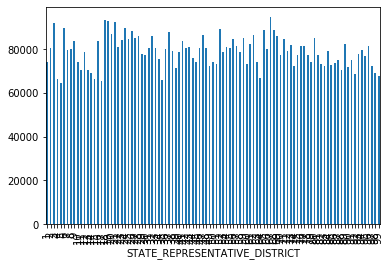

In [101]:
grouped=oh_df.groupby('STATE_REPRESENTATIVE_DISTRICT')
grouped['SOS_VOTERID'].count().plot.bar()

In [102]:
status_df=oh_df.loc[oh_df['VOTER_STATUS'] == 'ACTIVE']

In [103]:
grouped_active=status_df.groupby('STATE_REPRESENTATIVE_DISTRICT')

In [104]:
n_voters=grouped['SOS_VOTERID'].count()

In [105]:
n_active=grouped_active['SOS_VOTERID'].count()

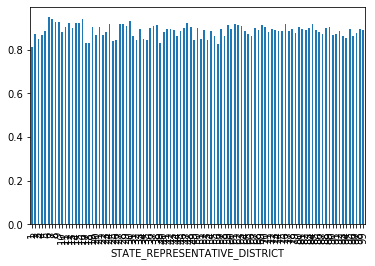

In [106]:
n_active.divide(n_voters).plot.bar()

In [107]:
for key in oh_df:
        if key[:7]=='GENERAL':
            print(key)

GENERAL-11/07/2000
GENERAL-11/06/2001
GENERAL-11/05/2002
GENERAL-11/04/2003
GENERAL-11/02/2004
GENERAL-11/08/2005
GENERAL-11/07/2006
GENERAL-11/06/2007
GENERAL-12/11/2007
GENERAL-11/04/2008
GENERAL-11/18/2008
GENERAL-11/03/2009
GENERAL-11/02/2010
GENERAL-11/08/2011
GENERAL-11/06/2012
GENERAL-11/05/2013
GENERAL-11/04/2014
GENERAL-11/03/2015
GENERAL-06/07/2016
GENERAL-11/08/2016
GENERAL-11/07/2017
GENERAL-08/07/2018
GENERAL-11/06/2018


In [108]:
import seaborn

In [109]:
election_list = []
election_i = []
general_list = []
primary_list = []
for key in oh_df:
        if key[:7]=='GENERAL':
                election_list.append(key)
                general_list.append(key)
        elif key[:7]=='PRIMARY':
                election_list.append(key)
                primary_list.append(key)
        elif key[:7]=='SPECIAL':
                election_list.append(key)
print(election_list)

['PRIMARY-03/07/2000', 'GENERAL-11/07/2000', 'SPECIAL-05/08/2001', 'GENERAL-11/06/2001', 'PRIMARY-05/07/2002', 'GENERAL-11/05/2002', 'SPECIAL-05/06/2003', 'GENERAL-11/04/2003', 'PRIMARY-03/02/2004', 'GENERAL-11/02/2004', 'SPECIAL-02/08/2005', 'PRIMARY-05/03/2005', 'PRIMARY-09/13/2005', 'GENERAL-11/08/2005', 'SPECIAL-02/07/2006', 'PRIMARY-05/02/2006', 'GENERAL-11/07/2006', 'PRIMARY-05/08/2007', 'PRIMARY-09/11/2007', 'GENERAL-11/06/2007', 'PRIMARY-11/06/2007', 'GENERAL-12/11/2007', 'PRIMARY-03/04/2008', 'PRIMARY-10/14/2008', 'GENERAL-11/04/2008', 'GENERAL-11/18/2008', 'PRIMARY-05/05/2009', 'PRIMARY-09/08/2009', 'PRIMARY-09/15/2009', 'PRIMARY-09/29/2009', 'GENERAL-11/03/2009', 'PRIMARY-05/04/2010', 'PRIMARY-07/13/2010', 'PRIMARY-09/07/2010', 'GENERAL-11/02/2010', 'PRIMARY-05/03/2011', 'PRIMARY-09/13/2011', 'GENERAL-11/08/2011', 'PRIMARY-03/06/2012', 'GENERAL-11/06/2012', 'PRIMARY-05/07/2013', 'PRIMARY-09/10/2013', 'PRIMARY-10/01/2013', 'GENERAL-11/05/2013', 'PRIMARY-05/06/2014', 'GENERAL-

In [110]:
oh_df.loc[:,'PRIMARY-03/07/2000'].head()
    

0    None
1    None
2    None
3    None
4    None
Name: PRIMARY-03/07/2000, dtype: object

In [111]:
election_n=oh_df[election_list].isnull().sum(axis=1)


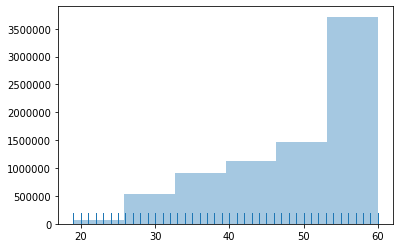

In [112]:
seaborn.distplot(election_n,bins=6,kde=False, rug=True);


In [113]:
print(len(election_list))

60


In [114]:
for key in oh_df:
    print(key)

SOS_VOTERID
COUNTY_NUMBER
COUNTY_ID
LAST_NAME
FIRST_NAME
MIDDLE_NAME
SUFFIX
DATE_OF_BIRTH
REGISTRATION_DATE
VOTER_STATUS
PARTY_AFFILIATION
RESIDENTIAL_ADDRESS1
RESIDENTIAL_SECONDARY_ADDR
RESIDENTIAL_CITY
RESIDENTIAL_STATE
RESIDENTIAL_ZIP
RESIDENTIAL_ZIP_PLUS4
RESIDENTIAL_COUNTRY
RESIDENTIAL_POSTALCODE
MAILING_ADDRESS1
MAILING_SECONDARY_ADDRESS
MAILING_CITY
MAILING_STATE
MAILING_ZIP
MAILING_ZIP_PLUS4
MAILING_COUNTRY
MAILING_POSTAL_CODE
CAREER_CENTER
CITY
CITY_SCHOOL_DISTRICT
COUNTY_COURT_DISTRICT
CONGRESSIONAL_DISTRICT
COURT_OF_APPEALS
EDU_SERVICE_CENTER_DISTRICT
EXEMPTED_VILL_SCHOOL_DISTRICT
LIBRARY
LOCAL_SCHOOL_DISTRICT
MUNICIPAL_COURT_DISTRICT
PRECINCT_NAME
PRECINCT_CODE
STATE_BOARD_OF_EDUCATION
STATE_REPRESENTATIVE_DISTRICT
STATE_SENATE_DISTRICT
TOWNSHIP
VILLAGE
WARD
PRIMARY-03/07/2000
GENERAL-11/07/2000
SPECIAL-05/08/2001
GENERAL-11/06/2001
PRIMARY-05/07/2002
GENERAL-11/05/2002
SPECIAL-05/06/2003
GENERAL-11/04/2003
PRIMARY-03/02/2004
GENERAL-11/02/2004
SPECIAL-02/08/2005
PRIMARY-05

In [115]:
oh_df.loc[:,'RESIDENTIAL_ADDRESS1':'RESIDENTIAL_ZIP']

,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP
0,122 CONCORD AVE,None,ST MARYS,OH,45885
1,932 SLEEPY HOLLOW DR,None,MONROE,OH,45050
2,13902 BENWOOD AVE,None,CLEVELAND,OH,44105
3,1090 S MUSCOVY DR,None,LOVELAND,OH,45140
4,16308 KOLLIN AVE,None,CLEVELAND,OH,44128
5,3419 E OXFORD OVAL,None,NORTH OLMSTED,OH,44070
6,6137 TAYLOR PIKE,None,BLANCHESTER,OH,45107
7,6787 LINDSLEY AV,None,ANDOVER,OH,44003
8,6321 TRAIL RIDGE CT,None,LOVELAND,OH,45140
9,25 PEPPER CREEK DR,None,PEPPER PIKE,OH,44124


In [116]:
test_df=oh_df.head()

In [117]:
print(test_df)

    SOS_VOTERID  COUNTY_NUMBER  COUNTY_ID  LAST_NAME FIRST_NAME MIDDLE_NAME  \
0  OH0019419095              6      40055    KITCHEN     LESLIE           L   
1  OH0019489283              9     482703      GRACE     AMANDA       LEIGH   
2  OH0015384921             18    2044314     CARNER    TIFFANY           J   
3  OH0020115764             13    6100757  VAN SCYOC      SUSAN           L   
4  OH0015058130             18    1674659      BERRY     NICOLE           L   

  SUFFIX DATE_OF_BIRTH REGISTRATION_DATE VOTER_STATUS  ... GENERAL-06/07/2016  \
0   None    1969-12-26        2008-01-09       ACTIVE  ...               None   
1   None    1974-11-09        2008-02-01       ACTIVE  ...               None   
2   None    1971-08-28        2016-05-25       ACTIVE  ...               None   
3   None    1973-08-01        2008-09-18       ACTIVE  ...               None   
4   None    1975-04-25        2009-08-19       ACTIVE  ...               None   

  PRIMARY-09/13/2016 GENERAL-11/08/201

In [118]:
oh_df.shape

(7825385, 106)

In [119]:
oh_df['test']=oh_df['RESIDENTIAL_ADDRESS1']+' '+oh_df['RESIDENTIAL_CITY']+' '+oh_df['RESIDENTIAL_STATE']+' '+oh_df['RESIDENTIAL_ZIP'].map(str)

In [120]:
oh_df.drop_duplicates(subset=['test'],keep='first',inplace=True)

In [121]:
oh_df.shape

(3681982, 107)

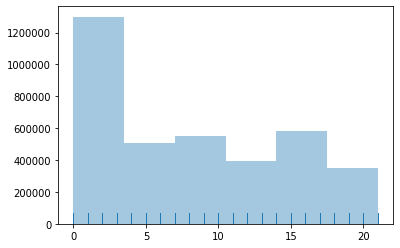

In [122]:
general_n=oh_df[general_list].notnull().sum(axis=1)
seaborn.distplot(general_n,bins=6,kde=False, rug=True);

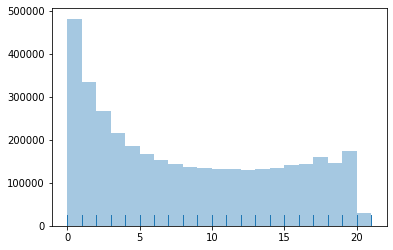

In [123]:
seaborn.distplot(general_n,bins=21,kde=False, rug=True);

In [124]:
len(general_list)

23

In [125]:
print(general_list)

['GENERAL-11/07/2000', 'GENERAL-11/06/2001', 'GENERAL-11/05/2002', 'GENERAL-11/04/2003', 'GENERAL-11/02/2004', 'GENERAL-11/08/2005', 'GENERAL-11/07/2006', 'GENERAL-11/06/2007', 'GENERAL-12/11/2007', 'GENERAL-11/04/2008', 'GENERAL-11/18/2008', 'GENERAL-11/03/2009', 'GENERAL-11/02/2010', 'GENERAL-11/08/2011', 'GENERAL-11/06/2012', 'GENERAL-11/05/2013', 'GENERAL-11/04/2014', 'GENERAL-11/03/2015', 'GENERAL-06/07/2016', 'GENERAL-11/08/2016', 'GENERAL-11/07/2017', 'GENERAL-08/07/2018', 'GENERAL-11/06/2018']


In [126]:
presidential_list=['GENERAL-11/07/2000','GENERAL-11/02/2004','GENERAL-11/04/2008','GENERAL-11/06/2012','GENERAL-11/08/2016']
len(presidential_list)

5

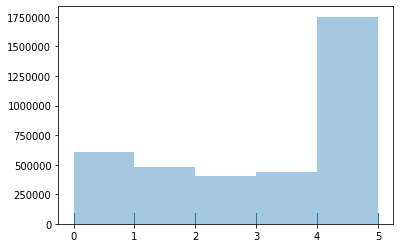

In [127]:
presidential_n=oh_df[presidential_list].notnull().sum(axis=1)
seaborn.distplot(presidential_n,bins=5,kde=False, rug=True);

In [128]:
oh_df['PRECINCT_NAME'].head()

0    PRECINCT ST. MARYS 3A
1                 MONROE 2
2           CLEVELAND-02-Q
3         MIAMI TOWNSHIP X
4           CLEVELAND-01-E
Name: PRECINCT_NAME, dtype: object

In [129]:
oh_df['PRECINCT_CODE'].head()

0       06AAE
1    09-P-AKN
2    18-P-ALJ
3    13-P-ACY
4    18-P-AIA
Name: PRECINCT_CODE, dtype: object

In [130]:
oh_df.groupby(['GENERAL-11/06/2012','GENERAL-11/08/2016']).size()

GENERAL-11/06/2012  GENERAL-11/08/2016
X                   X                     2138780
dtype: int64

In [131]:
oh_df.fillna('-1').groupby(['GENERAL-11/06/2012','GENERAL-11/08/2016']).size()

GENERAL-11/06/2012  GENERAL-11/08/2016
-1                  -1                     773260
                    X                      466904
X                   -1                     303038
                    X                     2138780
dtype: int64

In [132]:
grouped=oh_df.groupby(['STATE_REPRESENTATIVE_DISTRICT','PRECINCT_NAME'])

In [133]:
grouped['GENERAL-11/08/2016'].count()

STATE_REPRESENTATIVE_DISTRICT  PRECINCT_NAME                  
1                              BAUGHMAN TWP 1                     377
                               BAUGHMAN TWP 2                     476
                               CANAAN TWP 1                       397
                               CANAAN TWP 2 CRESTON               438
                               CANAAN TWP 3                       266
                               CHESTER TWP 1                      467
                               CHESTER TWP 2                      235
                               CHIPPEWA TWP 1                     406
                               CHIPPEWA TWP 2                     403
                               CHIPPEWA TWP 3                     315
                               CHIPPEWA TWP 4 DOY/TOWN            444
                               CHIPPEWA TWP 5 DOY/TOWN            354
                               CHIPPEWA TWP 6                     380
                           

In [134]:
g1 = grouped['GENERAL-11/08/2016'].count().reset_index()

In [135]:
g1.head()

,STATE_REPRESENTATIVE_DISTRICT,PRECINCT_NAME,GENERAL-11/08/2016
0,1,BAUGHMAN TWP 1,377
1,1,BAUGHMAN TWP 2,476
2,1,CANAAN TWP 1,397
3,1,CANAAN TWP 2 CRESTON,438
4,1,CANAAN TWP 3,266


In [136]:
results_prec=g1.groupby(['STATE_REPRESENTATIVE_DISTRICT']).max()

In [137]:
type(results_prec)

pandas.core.frame.DataFrame

In [138]:
result_dic=results_prec.to_dict()

In [139]:
print(result_dic)

{'PRECINCT_NAME': {1: 'WOOSTER TWP 3', 2: 'WORTH B', 3: 'WESTON TWP WILLOW', 4: 'SUGAR CREEK', 5: 'PRECINCT YELLOW CREEK TWP WEST', 6: 'WALTON HILLS-00-B', 7: 'STRONGSVILLE-04-G', 8: 'WOODMERE-00-A', 9: 'UNIVERSITY HEIGHTS-00-I', 10: 'CLEVELAND-14-O', 11: 'NEWBURGH HEIGHTS-00-A', 12: 'WARRENSVILLE HTS-07-B', 13: 'LINNDALE-00-A', 14: 'PARMA HEIGHTS-04-C', 15: 'PARMA-09-F', 16: 'WESTLAKE-06-D', 17: 'VALLEYVIEW-A', 18: 'GRANDVIEW-F', 19: 'WESTERVILLE 5-E', 20: 'WHITEHALL 4-C', 21: 'WORTH 4-D', 22: 'SHARON-A', 23: 'URBANCREST-A', 24: 'WASHINGTON-A', 25: 'MIFFLIN-B', 26: 'WHITEHALL 3-C', 27: 'TERRACE PARK B', 28: 'SYCAMORE N', 29: 'WHITEWATER C', 30: 'GREEN Z', 31: 'ST BERNARD 4-A', 32: 'SPRINGFIELD K', 33: 'WYOMING E', 34: 'CUY FALLS 8-B', 35: 'SPRINGFIELD TWP A', 36: 'TALLMADGE 4-D', 37: 'TWINSBURG TWP C', 38: 'TUSCARAWAS 4', 39: 'TROTWOOD 4-C', 40: 'VANDALIA-J', 41: 'RIVERSIDE-L', 42: 'WASHINGTON TWP X', 43: 'TROTWOOD 4-D', 44: 'PRECINCT TOLEDO 8H', 45: 'PRECINCT WASHINGTON 2', 46: 'PREC

In [140]:
print(results_prec)

                                                PRECINCT_NAME  \
STATE_REPRESENTATIVE_DISTRICT                                   
1                                               WOOSTER TWP 3   
2                                                     WORTH B   
3                                           WESTON TWP WILLOW   
4                                                 SUGAR CREEK   
5                              PRECINCT YELLOW CREEK TWP WEST   
6                                           WALTON HILLS-00-B   
7                                           STRONGSVILLE-04-G   
8                                               WOODMERE-00-A   
9                                     UNIVERSITY HEIGHTS-00-I   
10                                             CLEVELAND-14-O   
11                                      NEWBURGH HEIGHTS-00-A   
12                                      WARRENSVILLE HTS-07-B   
13                                              LINNDALE-00-A   
14                       

In [141]:
results_prec=results_prec.drop(columns=['GENERAL-11/08/2016'])

In [146]:
print(results_prec)

                                                PRECINCT_NAME
STATE_REPRESENTATIVE_DISTRICT                                
1                                               WOOSTER TWP 3
2                                                     WORTH B
3                                           WESTON TWP WILLOW
4                                                 SUGAR CREEK
5                              PRECINCT YELLOW CREEK TWP WEST
6                                           WALTON HILLS-00-B
7                                           STRONGSVILLE-04-G
8                                               WOODMERE-00-A
9                                     UNIVERSITY HEIGHTS-00-I
10                                             CLEVELAND-14-O
11                                      NEWBURGH HEIGHTS-00-A
12                                      WARRENSVILLE HTS-07-B
13                                              LINNDALE-00-A
14                                         PARMA HEIGHTS-04-C
15      

In [149]:
type(results_prec)

pandas.core.frame.DataFrame

In [152]:
new_dict=results_prec.to_dict()['PRECINCT_NAME']

In [155]:
new_dict[2]

'WORTH B'

In [156]:
import pickle

In [157]:
with open('precinct_dict.pickle', 'wb') as handle:
    pickle.dump(new_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [159]:
print(new_dict)

{1: 'WOOSTER TWP 3', 2: 'WORTH B', 3: 'WESTON TWP WILLOW', 4: 'SUGAR CREEK', 5: 'PRECINCT YELLOW CREEK TWP WEST', 6: 'WALTON HILLS-00-B', 7: 'STRONGSVILLE-04-G', 8: 'WOODMERE-00-A', 9: 'UNIVERSITY HEIGHTS-00-I', 10: 'CLEVELAND-14-O', 11: 'NEWBURGH HEIGHTS-00-A', 12: 'WARRENSVILLE HTS-07-B', 13: 'LINNDALE-00-A', 14: 'PARMA HEIGHTS-04-C', 15: 'PARMA-09-F', 16: 'WESTLAKE-06-D', 17: 'VALLEYVIEW-A', 18: 'GRANDVIEW-F', 19: 'WESTERVILLE 5-E', 20: 'WHITEHALL 4-C', 21: 'WORTH 4-D', 22: 'SHARON-A', 23: 'URBANCREST-A', 24: 'WASHINGTON-A', 25: 'MIFFLIN-B', 26: 'WHITEHALL 3-C', 27: 'TERRACE PARK B', 28: 'SYCAMORE N', 29: 'WHITEWATER C', 30: 'GREEN Z', 31: 'ST BERNARD 4-A', 32: 'SPRINGFIELD K', 33: 'WYOMING E', 34: 'CUY FALLS 8-B', 35: 'SPRINGFIELD TWP A', 36: 'TALLMADGE 4-D', 37: 'TWINSBURG TWP C', 38: 'TUSCARAWAS 4', 39: 'TROTWOOD 4-C', 40: 'VANDALIA-J', 41: 'RIVERSIDE-L', 42: 'WASHINGTON TWP X', 43: 'TROTWOOD 4-D', 44: 'PRECINCT TOLEDO 8H', 45: 'PRECINCT WASHINGTON 2', 46: 'PRECINCT TOLEDO 7J', 4

In [162]:
new_dict[1]

'WOOSTER TWP 3'

In [163]:
new_dict.items()

dict_items([(1, 'WOOSTER TWP 3'), (2, 'WORTH B'), (3, 'WESTON TWP WILLOW'), (4, 'SUGAR CREEK'), (5, 'PRECINCT YELLOW CREEK TWP WEST'), (6, 'WALTON HILLS-00-B'), (7, 'STRONGSVILLE-04-G'), (8, 'WOODMERE-00-A'), (9, 'UNIVERSITY HEIGHTS-00-I'), (10, 'CLEVELAND-14-O'), (11, 'NEWBURGH HEIGHTS-00-A'), (12, 'WARRENSVILLE HTS-07-B'), (13, 'LINNDALE-00-A'), (14, 'PARMA HEIGHTS-04-C'), (15, 'PARMA-09-F'), (16, 'WESTLAKE-06-D'), (17, 'VALLEYVIEW-A'), (18, 'GRANDVIEW-F'), (19, 'WESTERVILLE 5-E'), (20, 'WHITEHALL 4-C'), (21, 'WORTH 4-D'), (22, 'SHARON-A'), (23, 'URBANCREST-A'), (24, 'WASHINGTON-A'), (25, 'MIFFLIN-B'), (26, 'WHITEHALL 3-C'), (27, 'TERRACE PARK B'), (28, 'SYCAMORE N'), (29, 'WHITEWATER C'), (30, 'GREEN Z'), (31, 'ST BERNARD 4-A'), (32, 'SPRINGFIELD K'), (33, 'WYOMING E'), (34, 'CUY FALLS 8-B'), (35, 'SPRINGFIELD TWP A'), (36, 'TALLMADGE 4-D'), (37, 'TWINSBURG TWP C'), (38, 'TUSCARAWAS 4'), (39, 'TROTWOOD 4-C'), (40, 'VANDALIA-J'), (41, 'RIVERSIDE-L'), (42, 'WASHINGTON TWP X'), (43, 'T

In [164]:
new_dict[3]

'WESTON TWP WILLOW'